## Importing required packages

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from itertools import chain
import re

sns.set(style="whitegrid")
sns.set_palette("BuGn_r")

## Parsing the GO data scraped from the yeastract spider

In [2]:
def GO_parse(df, go_param): 
    
    

    df1 = df.loc[:, [go_param, "proteinname"]]
    cols = df1.columns.difference([go_param])
    go_lists = df1[go_param].str.split(":")
    
    long_df =  (df1.loc[df1.index.repeat(go_lists.str.len()), cols]
         .assign(go_IC=list(chain.from_iterable(go_lists.tolist()))))
    
    return long_df

In [50]:
def df_headtail(df): 
    short_df = pd.concat([df.iloc[:11,:], df.iloc[-11:,:]], ignore_index=False)
    
    return short_df

In [3]:
df_GO = pd.read_csv("gene_data_GO.csv")

# The protein name has different capitalizations in one page compared to other. 
# Proteinname will be set to lowercase to aid later join operations

df_GO["proteinname"] = df_GO["proteinname"].str.lower()
df_GO["proteinname"] = df_GO["proteinname"].apply(lambda x: x[:-1] if re.match("(\w*)(\d)(p$)", x) else x)
df_GO

,description,go_BioProc,go_CellComp,go_MolFunc,proteinname
0,Mitochondrial protein of unknown function,mitophagy:mitochondrion organization:biologica...,mitochondrion:mitochondrial outer membrane:mem...,molecular_function unknown,fun14
1,"Protein of unknown function, required for norm...",biological_process unknown,cytoplasm:membrane:integral component of membrane,molecular_function unknown,mtc4
2,S-adenosylmethionine transporter of the mitoch...,transport:S-adenosyl-L-methionine transport:S-...,mitochondrion:mitochondrial inner membrane:mem...,S-adenosyl-L-methionine transmembrane transpor...,pet8
3,Cyclin-dependent protein kinase regulatory sub...,"chromatin remodeling:transcription, DNA-templa...",cyclin-dependent protein kinase holoenzyme com...,cyclin-dependent protein serine/threonine kina...,cks1
4,Protein of unknown function; induced by ketoco...,transport:protein transport:eisosome assembly:...,plasma membrane:membrane:integral component of...,molecular_function unknown,fhn1
5,"Protein of unknown function; the authentic, no...",biological_process unknown:cellular response t...,nucleus:cytoplasm:mitochondrion:mitochondrial ...,molecular_function unknown,iml2
6,Catalytic subunit of the main cell cycle cycli...,meiotic DNA double-strand break processing:chr...,astral microtubule:cyclin-dependent protein ki...,nucleotide binding:RNA polymerase II core bind...,cdc28
7,Putative protein of unknown function; diploid ...,proteolysis:biological_process unknown:protein...,cytoplasm:endoplasmic reticulum:cell periphery,molecular_function unknown:thiol-dependent ubi...,ypl191c
8,Putative protein of unknown function; YPL039W ...,biological_process unknown,cellular_component unknown,molecular_function unknown,ypl039w
9,NADPH-dependent 1-acyl dihydroxyacetone phosph...,phosphatidic acid biosynthetic process:metabol...,cytoplasm:mitochondrion:mitochondrial outer me...,acylglycerone-phosphate reductase activity:nuc...,ayr1


In [4]:
bioproc = df_GO.loc[:, ["proteinname", "go_BioProc"]]
bioproc_long = GO_parse(bioproc, "go_BioProc")
bioproc_long

,proteinname,go_IC
0,fun14,mitophagy
0,fun14,mitochondrion organization
0,fun14,biological_process unknown
0,fun14,phospholipid homeostasis
1,mtc4,biological_process unknown
2,pet8,transport
2,pet8,S-adenosyl-L-methionine transport
2,pet8,S-adenosyl-L-methionine transmembrane transport
3,cks1,chromatin remodeling
3,cks1,"transcription, DNA-templated"


In [5]:
cellcomp = df_GO.loc[:, ["proteinname", "go_CellComp"]]
cellcomp_long = GO_parse(cellcomp, "go_CellComp")
cellcomp_long

,proteinname,go_IC
0,fun14,mitochondrion
0,fun14,mitochondrial outer membrane
0,fun14,membrane
0,fun14,integral component of membrane
0,fun14,integral component of mitochondrial outer memb...
1,mtc4,cytoplasm
1,mtc4,membrane
1,mtc4,integral component of membrane
2,pet8,mitochondrion
2,pet8,mitochondrial inner membrane


In [6]:
molfunc = df_GO.loc[:, ["proteinname", "go_MolFunc"]]
molfunc_long = GO_parse(molfunc, "go_MolFunc")
molfunc_long

,proteinname,go_IC
0,fun14,molecular_function unknown
1,mtc4,molecular_function unknown
2,pet8,S-adenosyl-L-methionine transmembrane transpor...
3,cks1,cyclin-dependent protein serine/threonine kina...
3,cks1,protein kinase binding
3,cks1,protein kinase activator activity
3,cks1,histone binding
3,cks1,ubiquitin binding
3,cks1,cyclin-dependent protein serine/threonine kina...
4,fhn1,molecular_function unknown


In [7]:
bioproc_long.to_csv(r"/Users/willettr/NYCDSA/scrapy/yeastract/bioproc.csv", index=None, header=True)
cellcomp_long.to_csv(r"/Users/willettr/NYCDSA/scrapy/yeastract/cellcomp.csv", index=None, header=True)
molfunc_long.to_csv(r"/Users/willettr/NYCDSA/scrapy/yeastract/molfunc.csv", index=None, header=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/willettr/NYCDSA/scrapy/yeastract/bioproc.csv'

## Import of all scraped data

In [8]:
gene_names = pd.read_csv("./data/gene_data_locus.csv")
prot_seq = pd.read_csv("gene_seq.csv")

In [9]:
norm_v_high = pd.read_csv("./data/normal_v_high.csv")
norm_v_low = pd.read_csv("./data/normal_v_low.csv")
glucose_v_ethanol = pd.read_csv("./data/glucose_v_ethanol.csv")
wt_v_biofuel = pd.read_csv("./data/wt_v_biofuel.csv")

#### Aligning the column names for each of the app data tables

In [10]:
norm_v_high.columns=["sysname", "_30deg", "_37deg", "p_value", "expression_ratio"]

In [11]:
norm_v_low.columns=["sysname", "_30deg", "_15deg", "p_value", "expression_ratio"]

In [12]:
glucose_v_ethanol.columns=["sysname", "glucose", "ethanol", "p_value", "expression_ratio"]

In [13]:
wt_v_biofuel.columns=["sysname", "wt", "biofuel", "p_value", "expression_ratio"]

In [14]:
# One aa must be removed from the length due to the * representing the stop codon
prot_seq = prot_seq.assign(prot_length = (prot_seq["prot_sequence"].str.len() - 1)) 

In [15]:
prot_seq["proteinname"] = prot_seq["proteinname"].str.lower()

## Joining Data Tables

In [16]:
high_temp = pd.merge(norm_v_high, prot_seq, how="inner", on="sysname")
low_temp = pd.merge(norm_v_low, prot_seq, how="inner", on="sysname")
carbonSource = pd.merge(glucose_v_ethanol, prot_seq, how="inner", on="sysname")
biofuel = pd.merge(wt_v_biofuel, prot_seq, how="inner", on="sysname")

In [17]:
high_temp.head()

,sysname,_30deg,_37deg,p_value,expression_ratio,proteinname,prot_sequence,prot_length
0,YJL138C,1.008470,15.420209,0.042093,15.290702,tif2,MSEGITDIEESQIQTNYDKVVYKFDDMELDENLLRGVFGYGFEEPS...,395.0
1,YMR322C,0.017480,0.246366,0.023775,14.094306,sno4,MTPKRALISLTSYHGPFYKDGAKTGVFVVEILRSFDTFEKHGFEVD...,237.0
2,YDR218C,0.374196,4.558262,0.012051,12.181497,spr28,MFPMKDHSALEQHTLSRDELRRRKGYKKGLQLSILLLGEKGSGKST...,423.0
3,YNL318C,0.017480,0.191990,0.047018,10.983491,hxt14,MTAQIPYQHSSGYISHFHNNELDAGRGRDYNVTIKYLDDKEENIEG...,540.0
4,YOR255W,0.018115,0.181823,0.008007,10.037359,osw1,MRAPPSPRKSKSGHFFYLYFRLCQLFSGRKLKRRWHVHKLHIHQYN...,278.0


In [18]:
molfunc.head()

,proteinname,go_MolFunc
0,fun14,molecular_function unknown
1,mtc4,molecular_function unknown
2,pet8,S-adenosyl-L-methionine transmembrane transpor...
3,cks1,cyclin-dependent protein serine/threonine kina...
4,fhn1,molecular_function unknown


In [19]:
bioproc_long.head()

,proteinname,go_IC
0,fun14,mitophagy
0,fun14,mitochondrion organization
0,fun14,biological_process unknown
0,fun14,phospholipid homeostasis
1,mtc4,biological_process unknown


In [20]:
# This needs to be simplified as a looped function

high_bioproc = pd.merge(high_temp.loc[:,["proteinname", "prot_length"]], bioproc_long, how="left", on="proteinname")
high_cellcomp = pd.merge(high_temp.loc[:,["proteinname", "prot_length"]], cellcomp_long, how="left", on="proteinname")
high_molfunc = pd.merge(high_temp.loc[:,["proteinname", "prot_length"]], molfunc_long, how="left", on="proteinname")

low_bioproc = pd.merge(low_temp.loc[:,["proteinname", "prot_length"]], bioproc_long, how="left", on="proteinname")
low_cellcomp = pd.merge(low_temp.loc[:,["proteinname", "prot_length"]], cellcomp_long, how="left", on="proteinname")
low_molfunc = pd.merge(low_temp.loc[:,["proteinname", "prot_length"]], molfunc_long, how="left", on="proteinname")

carbonSource_bioproc = pd.merge(carbonSource.loc[:,["proteinname", "prot_length"]], bioproc_long, how="left", on="proteinname")
carbonSource_cellcomp = pd.merge(carbonSource.loc[:,["proteinname", "prot_length"]], cellcomp_long, how="left", on="proteinname")
carbonSource_molfunc = pd.merge(carbonSource.loc[:,["proteinname", "prot_length"]], molfunc_long, how="left", on="proteinname")

biofuel_bioproc = pd.merge(biofuel.loc[:,["proteinname", "prot_length"]], bioproc_long, how="left", on="proteinname")
biofuel_cellcomp = pd.merge(biofuel.loc[:,["proteinname", "prot_length"]], cellcomp_long, how="left", on="proteinname")
biofuel_molfunc = pd.merge(biofuel.loc[:,["proteinname", "prot_length"]], molfunc_long, how="left", on="proteinname")


In [21]:
biofuel_molfunc

,proteinname,prot_length,go_IC
0,ddi3,225.0,molecular_function unknown
1,ddi3,225.0,catalytic activity
2,ddi3,225.0,phosphoric diester hydrolase activity
3,ddi3,225.0,lyase activity
4,ddi3,225.0,cyanamide hydratase activity
5,ddi3,225.0,metal ion binding
6,ypl278c,100.0,molecular_function unknown
7,sno4,237.0,peptidase activity
8,sno4,237.0,cysteine-type peptidase activity
9,sno4,237.0,hydrolase activity


## Gene Ontology Analysis

### For the entire yeast genome

In [22]:
bioproc_long_all = bioproc_long.groupby("go_IC").agg("count").sort_values("proteinname", ascending=False).assign(percent_total = lambda x: 100*x/(len(set(bioproc_long["proteinname"].tolist()))))

In [23]:
bioproc_long_all


,proteinname,percent_total
go_IC,,
biological_process unknown,1029,18.490566
transport,800,14.375562
"transcription, DNA-templated",518,9.308176
"regulation of transcription, DNA-templated",505,9.074573
protein transport,383,6.882300
oxidation-reduction process,334,6.001797
cell cycle,313,5.624438
metabolic process,281,5.049416
translation,273,4.905660


In [25]:
cellcomp_long_all = cellcomp_long.groupby("go_IC").agg("count").sort_values("proteinname", ascending=False).assign(percent_total = lambda x: 100*x/(len(set(cellcomp_long["proteinname"].tolist()))))
cellcomp_long_all

,proteinname,percent_total
go_IC,,
cytoplasm,2215,39.802336
nucleus,2107,37.861635
membrane,1668,29.973046
integral component of membrane,1254,22.533693
mitochondrion,1084,19.478886
cytosol,673,12.093441
endoplasmic reticulum,615,11.051213
cellular_component unknown,599,10.763702
plasma membrane,477,8.571429


In [26]:
molfunc_long_all = molfunc_long.groupby("go_IC").agg("count").sort_values("proteinname", ascending=False).assign(percent_total = lambda x: 100*x/(len(set(molfunc_long["proteinname"].tolist()))))
molfunc_long_all

,proteinname,percent_total
go_IC,,
molecular_function unknown,1804,32.416891
nucleotide binding,889,15.974843
metal ion binding,720,12.938005
transferase activity,667,11.985624
ATP binding,631,11.338724
hydrolase activity,621,11.159030
DNA binding,460,8.265948
RNA binding,384,6.900270
catalytic activity,355,6.379155


### Growth in High Temperature (37C) vs ideal temperature (30C)

In [122]:
def count_join(var1, var2): 
    var1_n = var1.drop(columns="prot_length").groupby("go_IC").agg("count").sort_values("proteinname", ascending=False).assign(percent_exp = lambda x: 100*x/(len(set(var1["proteinname"].tolist()))))
    df = pd.merge(var2, var1_n, how="inner", on="go_IC")
    df = df.assign(GO_diff = lambda x: (x["percent_exp"]- x["percent_total"])).sort_values("GO_diff", ascending=False)
    
    return df

[Text(0, 0.5, 'GO: Biological Processes'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Biologic Process Changes During Heat Shock')]

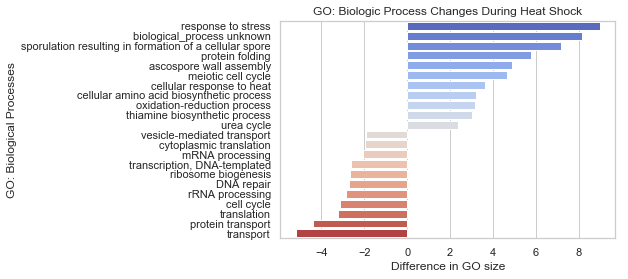

In [123]:
high_bioproc_comb = count_join(high_bioproc, bioproc_long_all)
high_bioproc_comb = df_headtail(high_bioproc_comb)

p = sns.barplot(data = high_bioproc_comb, y=high_bioproc_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Biologic Process Changes During Heat Shock", xlabel="Difference in GO size", ylabel="GO: Biological Processes")

[Text(0, 0.5, 'GO: Cellular Component'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Cellular Component Changes During Heat Shock')]

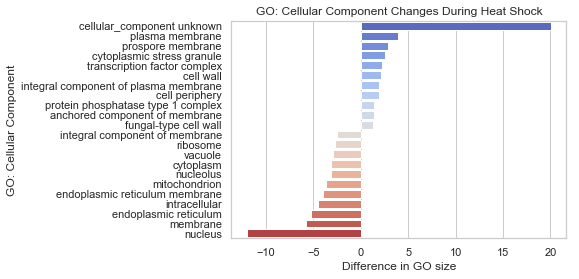

In [124]:
high_cellcomp_comb = count_join(high_cellcomp, cellcomp_long_all)
high_cellcomp_comb = df_headtail(high_cellcomp_comb)

p = sns.barplot(data = high_cellcomp_comb, y=high_cellcomp_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Cellular Component Changes During Heat Shock", xlabel="Difference in GO size", ylabel="GO: Cellular Component")

[Text(0, 0.5, 'GO: Molecular Function'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Molecular Function Changes During Heat Shock')]

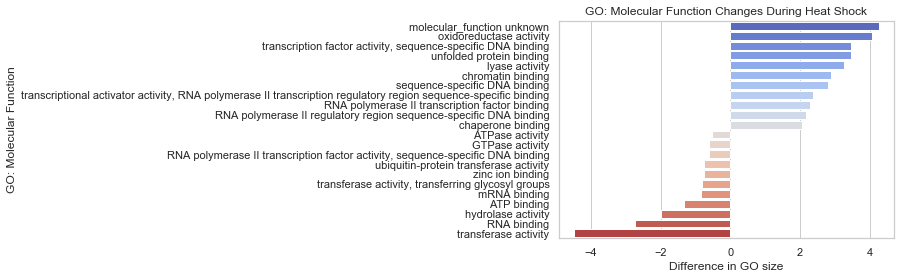

In [125]:
high_molfunc_comb = count_join(high_molfunc, molfunc_long_all)
high_molfunc_comb = df_headtail(high_molfunc_comb)

p = sns.barplot(data = high_molfunc_comb, y=high_molfunc_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Molecular Function Changes During Heat Shock", xlabel="Difference in GO size", ylabel="GO: Molecular Function")

### Growth in Low Temperature (15C) vs idea temperature (30C)

[Text(0, 0.5, 'GO: Biological Process'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Biologic Process Changes During Cold Shock')]

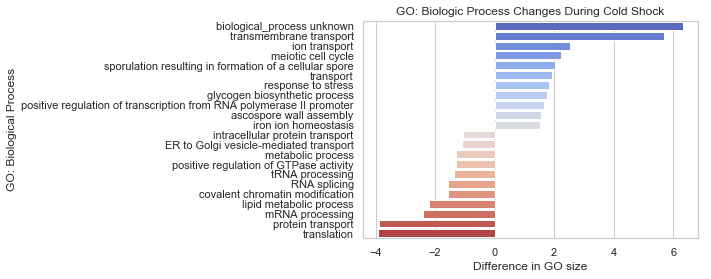

In [127]:
low_bioproc_comb = count_join(low_bioproc, bioproc_long_all)
low_bioproc_comb = df_headtail(low_bioproc_comb)

p = sns.barplot(data = low_bioproc_comb, y=low_bioproc_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Biologic Process Changes During Cold Shock", xlabel="Difference in GO size", ylabel="GO: Biological Process")

[Text(0, 0.5, 'GO: Cellular Components'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Cellular Component Changes During Cold Shock')]

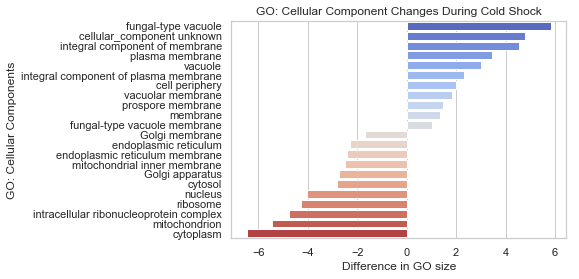

In [128]:
low_cellcomp_comb = count_join(low_cellcomp, cellcomp_long_all)
low_cellcomp_comb = df_headtail(low_cellcomp_comb)

p = sns.barplot(data = low_cellcomp_comb, y=low_cellcomp_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Cellular Component Changes During Cold Shock", xlabel="Difference in GO size", ylabel="GO: Cellular Components")

[Text(0, 0.5, 'GO: Molecular Function'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Molecular Function Changes During Cold Shock')]

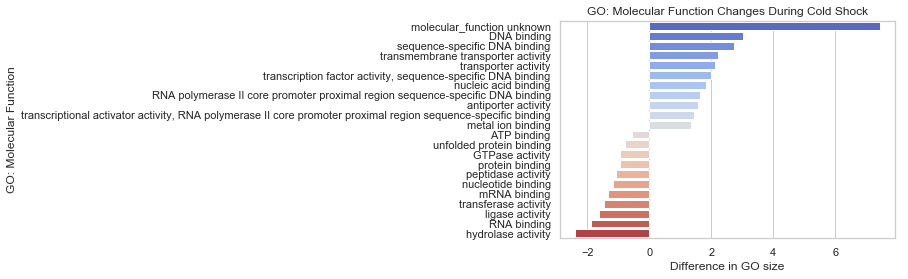

In [129]:
low_molfunc_comb = count_join(low_molfunc, molfunc_long_all)
low_molfunc_comb= df_headtail(low_molfunc_comb)

p = sns.barplot(data = low_molfunc_comb, y=low_molfunc_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Molecular Function Changes During Cold Shock", xlabel="Difference in GO size", ylabel="GO: Molecular Function")

### Glucose vs Ethanol as a Carbon Source

[Text(0, 0.5, 'GO: Biological Process'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Biologic Process Changes Using Ethanol Rather Than Glucose As Carbon Source')]

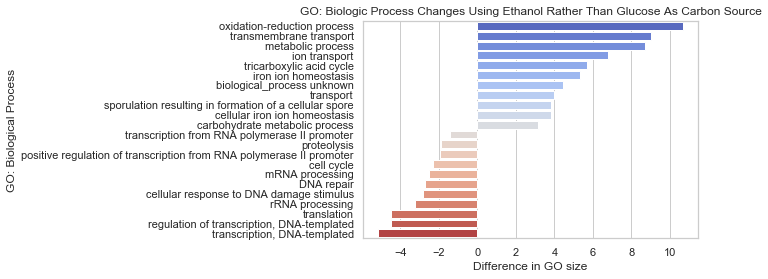

In [130]:
carbonSource_bioproc_comb = count_join(carbonSource_bioproc, bioproc_long_all)
carbonSource_bioproc_comb = df_headtail(carbonSource_bioproc_comb)

p = sns.barplot(data = carbonSource_bioproc_comb, y=carbonSource_bioproc_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Biologic Process Changes Using Ethanol Rather Than Glucose As Carbon Source", xlabel="Difference in GO size", ylabel="GO: Biological Process")

[Text(0, 0.5, 'GO: Cellular Component'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Cellular Component Changes Using Ethanol Rather Than Glucose As Carbon Source')]

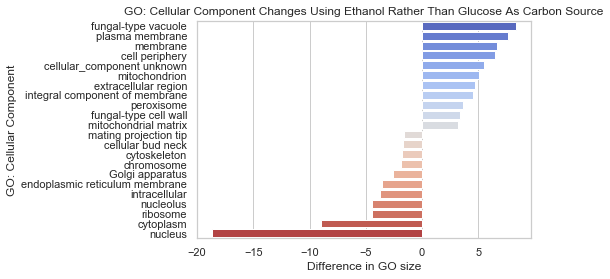

In [131]:
carbonSource_cellcomp_comb = count_join(carbonSource_cellcomp, cellcomp_long_all)
carbonSource_cellcomp_comb = df_headtail(carbonSource_cellcomp_comb)

p = sns.barplot(data = carbonSource_cellcomp_comb, y=carbonSource_cellcomp_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Cellular Component Changes Using Ethanol Rather Than Glucose As Carbon Source", xlabel="Difference in GO size", ylabel="GO: Cellular Component")

[Text(0, 0.5, 'GO: Molecular Function'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Molecular Function Changes Using Ethanol Rather Than Glucose As Carbon Source')]

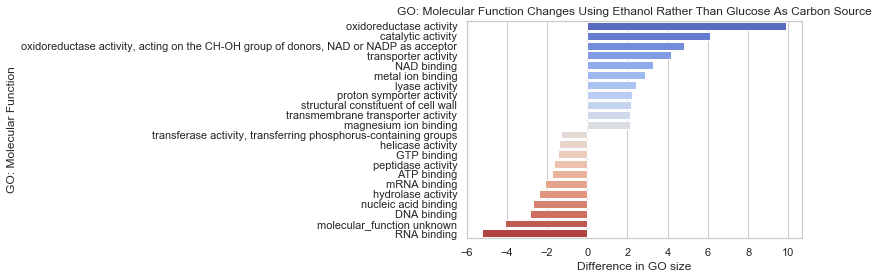

In [132]:
carbonSource_molfunc_comb = count_join(carbonSource_molfunc, molfunc_long_all)
carbonSource_molfunc_comb = df_headtail(carbonSource_molfunc_comb)

p = sns.barplot(data = carbonSource_molfunc_comb, y=carbonSource_molfunc_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Molecular Function Changes Using Ethanol Rather Than Glucose As Carbon Source", xlabel="Difference in GO size", ylabel="GO: Molecular Function")

### Wild Type Strain vs Biofuel Production strain

[Text(0, 0.5, 'GO: Biological Processes'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Biologic Process in Biofuel Production Strain vs Wildtype Yeast')]

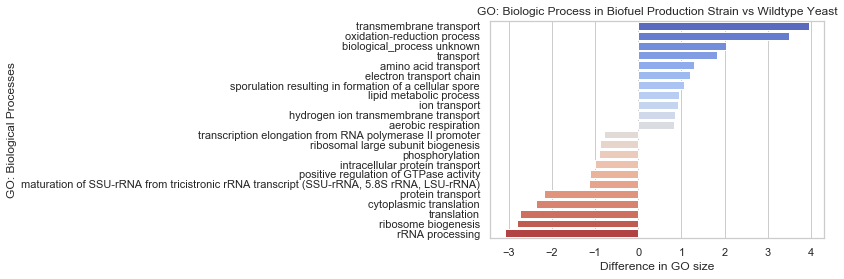

In [133]:
biofuel_bioproc_comb = count_join(biofuel_bioproc, bioproc_long_all)
biofuel_bioproc_comb = df_headtail(biofuel_bioproc_comb)

p = sns.barplot(data = biofuel_bioproc_comb, y=biofuel_bioproc_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Biologic Process in Biofuel Production Strain vs Wildtype Yeast", xlabel="Difference in GO size", ylabel="GO: Biological Processes")

[Text(0, 0.5, 'GO: Cellular Component'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Cellular Components in Biofuel Production Strain vs Wildtype Yeast')]

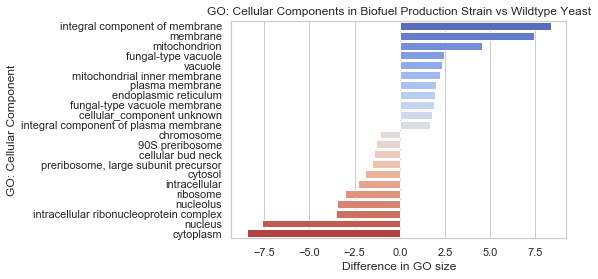

In [134]:
biofuel_cellcomp_comb = count_join(biofuel_cellcomp, cellcomp_long_all)
biofuel_cellcomp_comb = df_headtail(biofuel_cellcomp_comb)

p = sns.barplot(data = biofuel_cellcomp_comb, y=biofuel_cellcomp_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Cellular Components in Biofuel Production Strain vs Wildtype Yeast", xlabel="Difference in GO size", ylabel="GO: Cellular Component")

[Text(0, 0.5, 'GO: Molecular Function'),
 Text(0.5, 0, 'Difference in GO size'),
 Text(0.5, 1.0, 'GO: Molecular Function in Biofuel Production Strain vs Wildtype Yeast')]

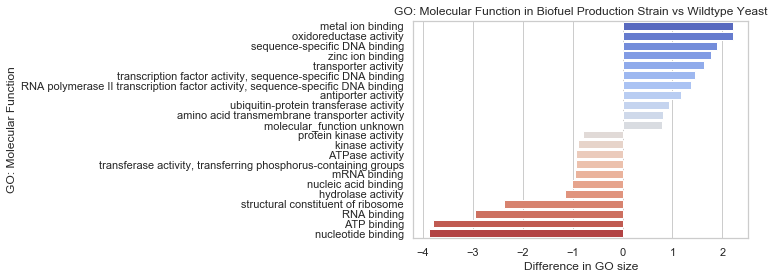

In [135]:
biofuel_molfunc_comb = count_join(biofuel_molfunc, molfunc_long_all)
biofuel_molfunc_comb = df_headtail(biofuel_molfunc_comb)

p = sns.barplot(data = biofuel_molfunc_comb, y=biofuel_molfunc_comb.index, x="GO_diff", palette = "coolwarm")
p.set(title="GO: Molecular Function in Biofuel Production Strain vs Wildtype Yeast", xlabel="Difference in GO size", ylabel="GO: Molecular Function")